In [1]:
%load_ext autoreload
%autoreload 2

from cometml_api import api
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
api.get_workspaces()

['bayesian-optimization', 'neighthan']

In [3]:
workspace = "bayesian-optimization"
projects = api.get_project_names_and_ids(workspace)
projects

{'dna-binding': '1a8bfadd1efa4ef798eaae80b4814ed2'}

In [5]:
project = projects["dna-binding"]

query_params = {"save_key": "pi"}
# query_params = [{"save_key": "mi"}, {"save_key": "pi"}, {"save_key": "pdts"}]
experiments = api.get_experiments_with_params(project, query_params)

In [8]:
# def get_...():
group_by = "save_key"
group_values = ["pdts", "mves", "es", "uniform", "bnn"]#, "hsic_pdts", "hsic_ms"]
# group_values = []
plot_metrics = ("best_values_ratio", "best_value_ratio")
filter_params = {"dataset": "crx_ref_r1"}
x_name = "step" # or timestamp or offset

grouped_exps = api.get_experiments_grouped_by(project, group_by)
grouped_exps = filter_exps(grouped_exps, filter_params)

In [7]:
def filter_exps(experiments, query_params_list):
    if not isinstance(query_params_list, Sequence):
        query_params_list = [query_params_list]

    experiment_keys = defaultdict(list)
    for group, keys in experiments.items():
        for key in keys:
            params = api.get_params(key)

            for query_params in query_params_list:
                add_experiment = True
                for name, value in query_params.items():
                    matched = name in params and params[name] == value
                    add_experiment &= matched

                if add_experiment:
                    experiment_keys[group].append(key)
                    break
    return experiment_keys

In [9]:
plot_data = defaultdict(lambda: defaultdict(list))

for grouped_value, experiments in grouped_exps.items():
    if group_values and grouped_value not in group_values:
        continue

    for experiment in experiments:
        metrics = api.get_metrics(experiment)

        for metric in plot_metrics:
            if metric in metrics:
                plot_data[metric][grouped_value].append(metrics[metric])

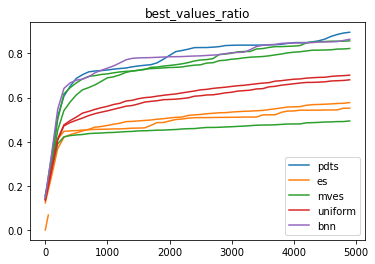

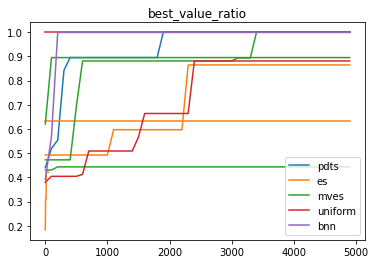

In [12]:
for metric in plot_data:
    plt.figure()
    for i, (group_name, dfs) in enumerate(plot_data[metric].items()):
        for j, df in enumerate(dfs):
            plt.plot(df[x_name][:50], df.value[:50], label=group_name if j == 0 else "", color=f"C{i}")

    plt.legend()
    plt.title(metric)

In [15]:
import torch

In [19]:
t = torch.tensor([[1,4],[6,-2]])
t

tensor([[ 1,  4],
        [ 6, -2]])

In [20]:
i = t.argmax(dim=1)
i

tensor([1, 0])

In [21]:
t[i]

tensor([[ 6, -2],
        [ 1,  4]])

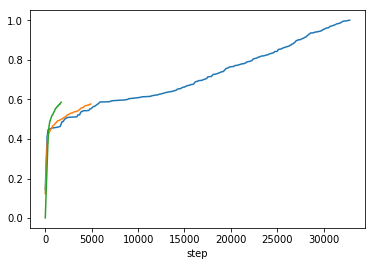

In [38]:
q = plot_data["best_values_ratio"]["es"][0]
q.set_index("step").value.plot()

q = plot_data["best_values_ratio"]["es"][1]
q.set_index("step").value.plot()

q = plot_data["best_values_ratio"]["es"][2]
q.set_index("step").value.plot()

In [79]:
combine = combine_mean_std # Callable[[pd.DataFrame], Tuple[...]]

for metric in plot_data:
    for group_name in plot_data[metric]:
        plot_data[metric][group_name] = combine(plot_data[metric][group_name], x_name)

best_value mi
2
best_value pi
6
fraction_best mi
2
fraction_best pi
6


In [ ]:
# combine: 

In [70]:
def combine_mean_std(dfs, x_name):
    # TODO: should we also have an option to pad the shorter arrays with nans?
    # the only problem is that then the uncertainty will be a bit messed up
    # some places will have std of more samples than others

    min_len = min([len(df) for df in dfs])

    matching_values = [df.value.values[:min_len] for df in dfs]
    x = dfs[0][x_name].values[:min_len]

    mean = np.mean(matching_values, axis=0)
    std = np.std(matching_values, axis=0)
    lower_bound = mean - std
    upper_bound = mean + std
    return x, mean, lower_bound, upper_bound

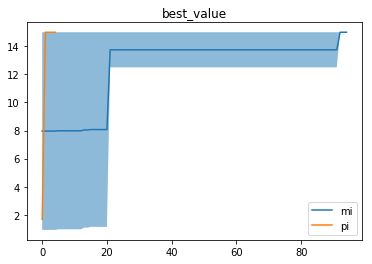

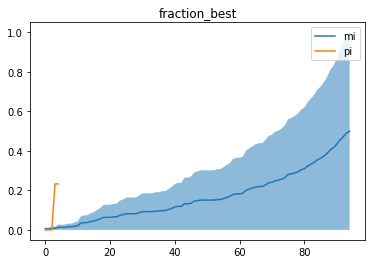

In [83]:
for metric in plot_data:
    plt.figure()
    for group_name, (x, mean, lower_bound, upper_bound) in plot_data[metric].items():
        plt.plot(x, mean, label=group_name)
        plt.fill_between(x, lower_bound, upper_bound, alpha=0.5)

    plt.legend()
    plt.title(metric)

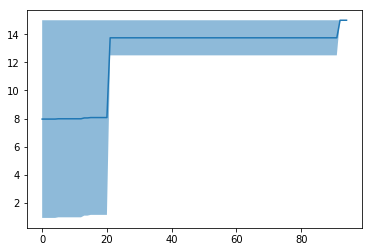

In [11]:
metrics = api.get_metrics(experiments[0])

In [20]:
metrics["best_value"].head()

,value,step,timestamp,offset
0,1.674,0,1536335631754,15
1,15.000,1,1536335906769,19
2,15.000,2,1536336265952,22
3,15.000,3,1536336549185,25
4,15.000,4,1536336842524,28


In [24]:
import pandas as pd

In [ ]:
df = pd.read_csv()

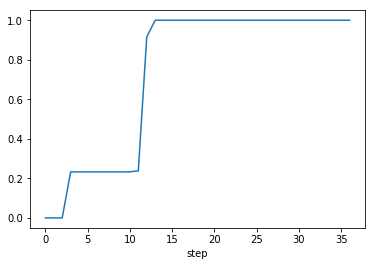

In [23]:
metrics["fraction_best"].set_index("step").value.plot()

In [21]:
%matplotlib inline